In [3]:
import yfinance as yf
import pandas as pd

# Lista de símbolos de ações
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'V', 'JPM', 'JNJ',
           'UNH', 'BAC', 'HD', 'PG', 'INTC', 'VZ', 'CSCO', 'PFE', 'KO', 'DIS']

# Data de início e fim para o histórico
start_date = '2000-01-01'
end_date = '2023-11-01'

# Cria um DataFrame vazio para armazenar os dados
historical_data = pd.DataFrame()

# Itera sobre os símbolos das ações e obtém os dados históricos
for symbol in symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    historical_data[symbol] = data['Adj Close']  # Adiciona uma coluna para o símbolo da ação

historical_data=historical_data.dropna(axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
hist_infos = historical_data.pct_change().dropna()

In [388]:
def simulacao(ativo,ativo_add,dataframe,size_position = 1):
    # VaR de 5% do ativo:
    var_5 = dataframe[ativo].quantile(.05)
    var_up = dataframe[ativo].quantile(.15)
    var_down = dataframe[ativo].quantile(.001)

    #Filtrando o periodo
    dataframe_5 = dataframe[(dataframe[ativo] >= var_down) &(dataframe[ativo] <= var_up)]
    
    #Covariancia no periodo
    cov_5 = dataframe_5[ativo].cov(dataframe_5[ativo_add])

    #Volatilidade no periodo
    variancia_5 = dataframe_5[ativo].var()

    # Beta estimado dentro do periodo
    beta_5 = 2*cov_5 / variancia_5
    intercepto = dataframe_5[ativo_add].median() - dataframe_5[ativo].median()*beta_5

    # Efeito do ativo segundo o modelo
    var_5_model = (1+beta_5*size_position)*var_5 
    # Efeito real

    var_5_post = (dataframe[ativo]+dataframe[ativo_add]*size_position).quantile(0.05)


    return var_5,var_5_post,var_5_model


-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.0218707

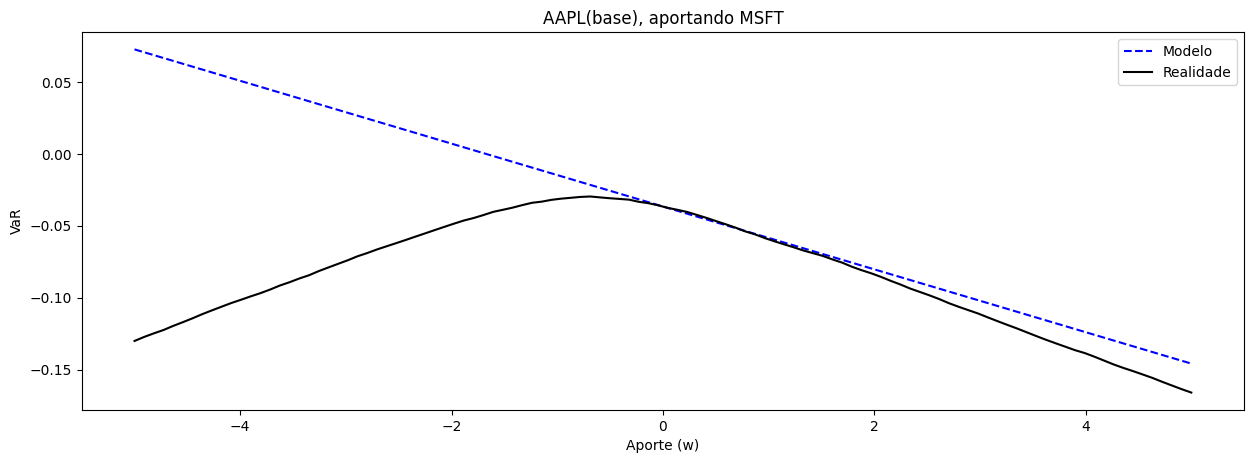

In [56]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5),dpi=100)

modelo = []
realidade = []
linea = np.linspace(-5,5,110)

ativo1 = 'AAPL'
ativo2 = 'MSFT'

for i in linea:
    _,y,y_ = simulacao(ativo1,ativo2,hist_infos,i)

    modelo.append(y_)
    realidade.append(y)


plt.plot(linea, modelo, 'b--', label='Modelo')

plt.plot(linea, realidade, 'black', label='Realidade')

plt.xlabel('Aporte (w)')
plt.ylabel('VaR')

plt.title(f'{ativo1}(base), aportando {ativo2}')

# Adicione uma legenda
plt.legend()

# Exiba o gráfico
plt.show()

In [375]:
def simulacao_limite(ativo,ativo_add,dataframe,size_position = 1):
    # VaR de 5% do ativo:
    var_5 = dataframe[ativo_add].quantile(.05)

    exp_x = dataframe.sort_values(ativo_add,key = lambda x: abs(x-var_5),ascending=True).iloc[:10][ativo]#.mean()
    
    var_5_model = (size_position)*var_5 + np.mean(exp_x)

    df_final = dataframe[ativo]+dataframe[ativo_add]*size_position

    var_5_post = df_final.quantile(0.05) 

    return var_5,var_5_post,var_5_model


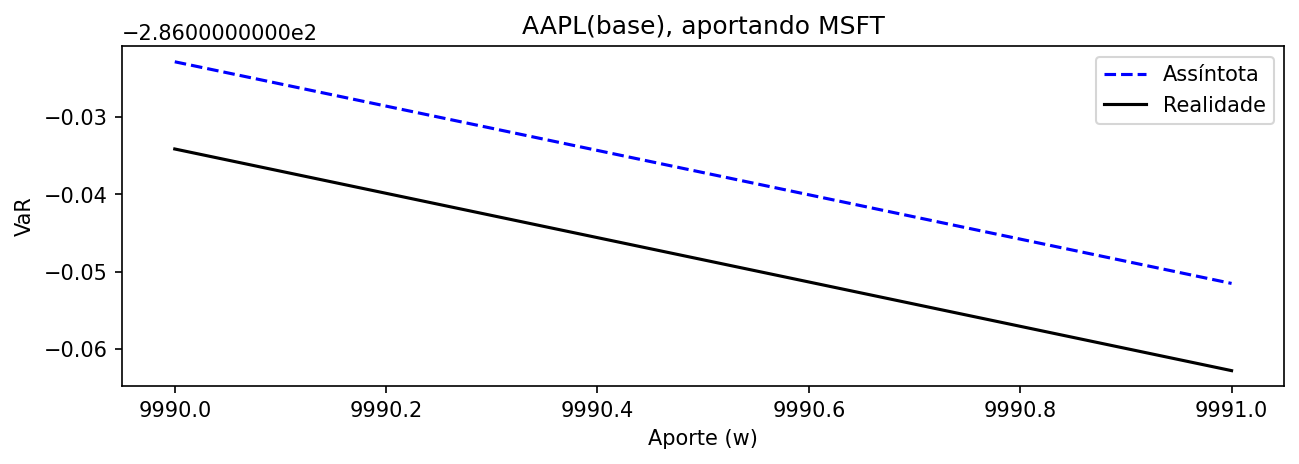

In [376]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3),dpi=150)

modelo = []
realidade = []
linea = np.linspace(9990,9991,2)

ativo1 = 'AAPL'
ativo2 = 'MSFT'

for i in linea:
    _,y,y_ = simulacao_limite(ativo1,ativo2,hist_infos,i)

    modelo.append(y_)
    realidade.append(y)


plt.plot(linea, modelo, 'b--', label='Assíntota')

plt.plot(linea, realidade, 'black', label='Realidade')

plt.xlabel('Aporte (w)')
plt.ylabel('VaR')

plt.title(f'{ativo1}(base), aportando {ativo2}')

# Adicione uma legenda
plt.legend()

# Exiba o gráfico
plt.show()

-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.021870774073973285
-0.0218707

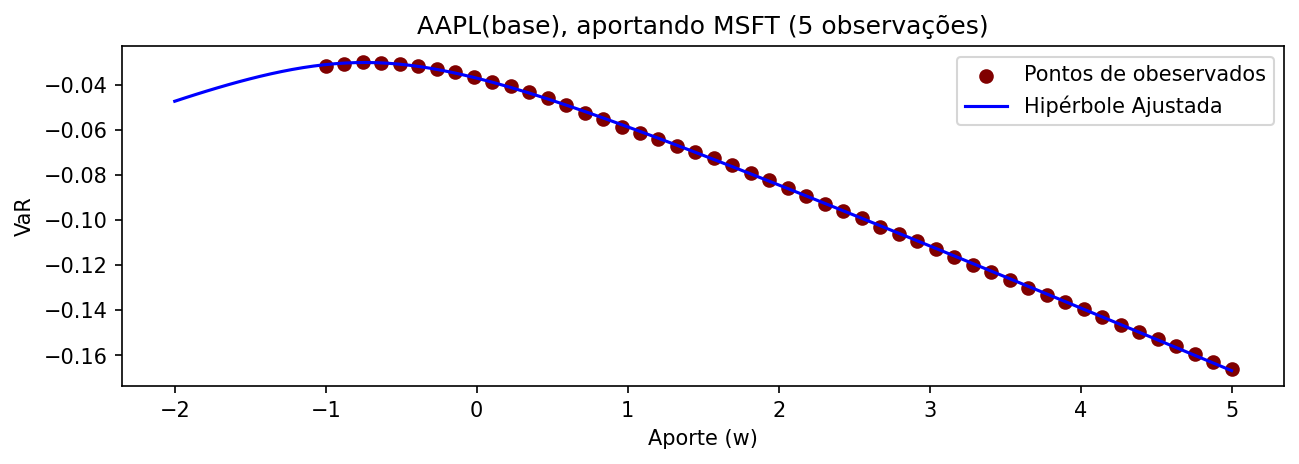

In [386]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10,3),dpi=150)


# Defina a equação da hipérbole com eixos deslocados no formato f(x, a, b, h, k):
def hyperbola(x, h, k, a, b):
    """
    Calcula os valores de y para uma hipérbole rotacionada dada x.

    Parâmetros:
    x : array_like
        Valores de x para os quais calcular y.
    h : float
        A coordenada x do centro da hipérbole.
    k : float
        A coordenada y do centro da hipérbole.
    a : float
        A distância do centro aos vértices.
    b : float
        A distância do centro às diretrizes.
    theta : float
        O ângulo de rotação em radianos.

    Retorna:
    y : ndarray
        Os valores de y correspondentes a x para a hipérbole.
    """
    
    return -a * np.sqrt( 1 +((x-h))**2  )*b + k 


realidade = []
linea = np.linspace(-1,5,50)

ativo1 = 'AAPL'
ativo2 = 'MSFT'

for i in linea:
    _,y,y_ = simulacao(ativo1,ativo2,hist_infos,i)

    realidade.append(y)

# Realize o ajuste da curva para encontrar os parâmetros a, b, h e k
params, covariance = curve_fit(hyperbola,linea,realidade, maxfev=50000)

# Parâmetros estimados
a, b, h, k = params

# Gere pontos da curva ajustada
x_fit = np.linspace(-2, 5, 100)
y_fit = hyperbola(x_fit, a, b, h, k)

# Plote os pontos de dados
plt.scatter(linea, realidade, label='Pontos de obeservados', color='maroon')

# Plote a curva ajustada
plt.plot(x_fit, y_fit, label='Hipérbole Ajustada', color='blue')

# Configurações do gráfico
plt.xlabel('Aporte (w)')
plt.ylabel('VaR')
plt.title(f'{ativo1}(base), aportando {ativo2} (5 observações)')
print(f'Estimações: {params}')

plt.legend()



# Nova abordagem


In [615]:
def find_parameters(X,Y,nivel=0.05):

    # Estats importantes

    var_x = np.quantile(X,nivel)
    var_y = np.quantile(Y,nivel)

    var_y_limit = Y.sort_values(key= lambda x: abs(x-var_y),ascending=True)[1]
    var_x_limit = X.sort_values(key= lambda x: abs(x-var_x),ascending=True)[1]

    exp_x = X[abs(Y-var_y) < abs(var_y-var_y_limit)  ]
    exp_x = np.mean(exp_x)

    exp_y = Y[abs(X-var_x) < abs(var_x-var_x_limit)  ]
    exp_y = np.mean(exp_y)


    # Estimando o primeiro parametro
    k =  (exp_y*var_x + exp_x*var_y)/(exp_y + var_y)
    h = (exp_y * (var_x-k))/(var_y**2)
    a = np.sqrt( ((var_x-k)/var_y)**2 - h**2  )
    b = -a * var_y

    print(a,b,h,k)

    return a,b,h,k

def hyperbola_2(x,a,b,h,k):
    return -b*np.sqrt(1 + ((x-h)**2)/(a**2) ) + k

a_ , b_, h_, k_ = np.round(find_parameters(hist_infos['AAPL'],-hist_infos['MSFT'],.05),3)





0.9339775422100246 0.027093555978358507 0.7603995632280185 -0.0015915023123453593


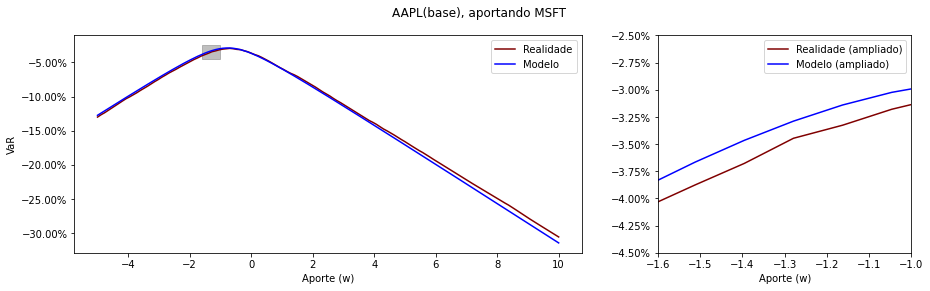

In [637]:

import matplotlib.ticker as mtick
import matplotlib.patches as patches

realidade = []
linea = np.linspace(-5, 10,130)

ativo1 = 'AAPL'
ativo2 = 'MSFT'

for i in linea:
    _,y,y_ = simulacao(ativo1,ativo2,hist_infos,i)

    realidade.append(y)

params, covariance = curve_fit(hyperbola_2,linea,realidade, maxfev=50000)


if 0:
    a_,b_,h_,k_ = params

# Gere pontos da curva ajustada
x_fit = np.linspace(-5, 10, 130)
y_fit = hyperbola_2(-x_fit,a_,b_,h_,k_)

fig, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(15, 4))

a0.plot(linea, realidade, label='Realidade', color='maroon')
a0.plot(x_fit, y_fit, label='Modelo', color='blue')

a1.plot(linea, realidade, label='Realidade (ampliado)', color='maroon')
a1.plot(x_fit, y_fit, label='Modelo (ampliado)', color='blue')


a1.set_xlim(-1.6,-1)
a1.set_ylim(-0.045,-0.025)

a0.fill_between(x=[-1.6,-1],y1=[-0.045,-0.045],y2 = [-0.025,-0.025], color='grey',alpha=0.5)


# Configurações do gráfico
a0.set_xlabel('Aporte (w)')
a0.set_ylabel('VaR')

a1.set_xlabel('Aporte (w)')
a1.set_ylabel('')
# Função para formatar os rótulos do eixo y como porcentagem
percent_formatter = mtick.PercentFormatter(xmax=1.0, decimals=2)

# Aplicar o formato ao eixo y em ambos os subplots
a0.yaxis.set_major_formatter(percent_formatter)
a1.yaxis.set_major_formatter(percent_formatter)

fig.suptitle(f'{ativo1}(base), aportando {ativo2}')

a0.legend()

a1.legend()


In [545]:
(y_fit[-1] - y_fit[-3])/(x_fit[-1] -  x_fit[-3])

-0.028344888026284418

In [538]:
(realidade[-1] - realidade[-3])/(linea[-1] -  linea[-3])

-0.025361144797956044